In [1]:
import numpy as np
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fft
from findiff import FinDiff
import matplotlib.patches as mpatches
from numpy.lib.type_check import common_type
from unidecode import unidecode
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
df0=pd.read_csv("rspk0.csv")     # T = 0 years
df25=pd.read_csv("rspk25.csv")   # T = 0.5 years
df50=pd.read_csv("rspk50.csv")   # T = 1 year
df75=pd.read_csv("rspk75.csv")   # T = 1.5 years
df99=pd.read_csv("rspk99.csv")   # T = 2 years

df99

theta_indices  r_indices  tau_indices  kappa_theta  pdgf_theta
0         0.004996   4.129886     0.026767     0.237177    0.438644
1         0.026266   4.130874     0.026765     0.221002    0.438532
2         0.047207   4.131660     0.026587     0.171630    0.438201
3         0.068616   4.131823     0.026746     0.190782    0.438520
4         0.089666   4.131034     0.026702     0.292907    0.438415
..             ...        ...          ...          ...         ...
292       6.182521   4.131299     0.026687     0.280267    0.438633
293       6.203579   4.129348     0.026788     0.167459    0.438664
294       6.224945   4.130249     0.026707     0.172877    0.438521
295       6.245998   4.129894     0.026798     0.271248    0.438633
296       6.267125   4.129128     0.026662     0.303867    0.438565

[297 rows x 5 columns]

In [3]:
r_theta0 = df0.iloc[:,1]
tau_theta0 = df0.iloc[:,2]
kappa_theta0 = df0.iloc[:,3]
theta_indices0 = np.sort(df0.iloc[:,0])
pdgf_theta0 = df0.iloc[:,4]

In [4]:
r_theta25 = df25.iloc[:,1]
tau_theta25 = df25.iloc[:,2]
kappa_theta25 = df25.iloc[:,3]
theta_indices25 = np.sort(df25.iloc[:,0])
pdgf_theta25 = df25.iloc[:,4]

In [5]:
r_theta50 = df50.iloc[:,1]
tau_theta50 = df50.iloc[:,2]
kappa_theta50 = df50.iloc[:,3]
theta_indices50 = np.sort(df50.iloc[:,0])
pdgf_theta50 = df50.iloc[:,4]

In [6]:
r_theta75 = df75.iloc[:,1]
tau_theta75 = df75.iloc[:,2]
kappa_theta75 = df75.iloc[:,3]
theta_indices75 = np.sort(df75.iloc[:,0])
pdgf_theta75 = df75.iloc[:,4]

In [7]:
r_theta99 = df99.iloc[:,1]
tau_theta99 = df99.iloc[:,2]
kappa_theta99 = df99.iloc[:,3]
theta_indices99 = np.sort(df99.iloc[:,0])
pdgf_theta99 = df99.iloc[:,4]

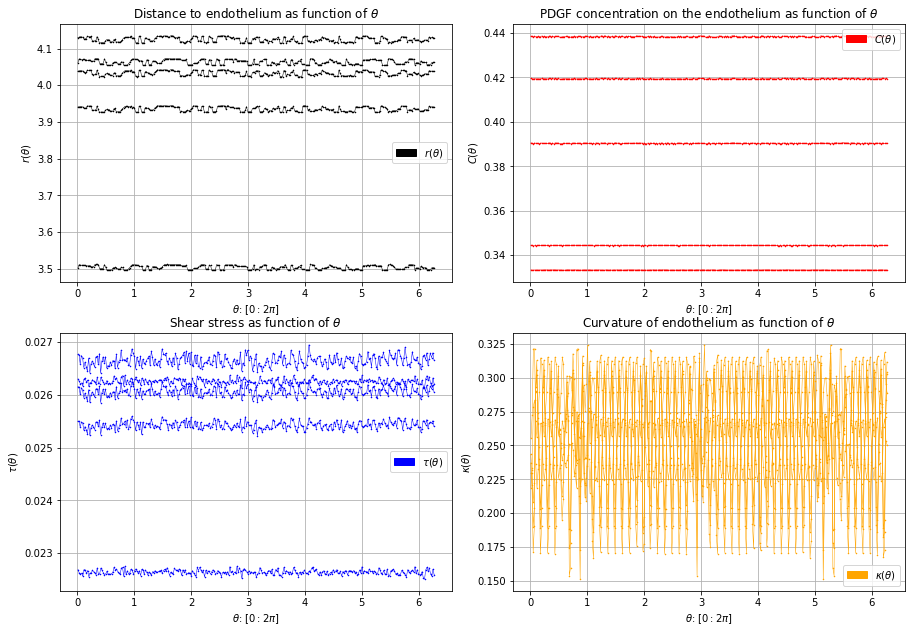

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(13,9))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

ax[0,0].plot(theta_indices0, r_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices25, r_theta25, color='black', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta50, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices75, r_theta75, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices99, r_theta99, color='black', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='black', label='$r(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[0,0].legend(handles=[pop_b])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,0].set_ylabel('$r(\\theta)$')
ax[0,0].set_title('Distance to endothelium as function of $\\theta$')
ax[0,0].grid()

ax[0,1].plot(theta_indices0, pdgf_theta0, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices25, pdgf_theta25, color='red', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices75, pdgf_theta75, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices99, pdgf_theta99, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='red', label='$C(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[0,1].legend(handles=[pop_b])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,1].set_ylabel('$C(\\theta)$')
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$')
ax[0,1].grid()

ax[1,0].plot(theta_indices0, tau_theta0, color='blue', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices25, tau_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,0].plot(theta_indices50, tau_theta50, color='blue', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices75, tau_theta75, color='blue', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices99, tau_theta99, color='blue', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='blue', label='$\\tau(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[1,0].legend(handles=[pop_b])
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,0].set_ylabel('$\\tau(\\theta)$')
ax[1,0].set_title('Shear stress as function of $\\theta$')
ax[1,0].grid()

ax[1,1].plot(theta_indices0, kappa_theta0, color='orange', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices25, kappa_theta25, color='orange', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_theta50, color='orange', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices75, kappa_theta75, color='orange', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices99, kappa_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,1].set_ylabel('$\\kappa(\\theta)$')
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$')
ax[1,1].grid()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps
#from csaps import UnivariateCubicSmoothingSpline

#np.random.seed(1234)

x0 = theta_indices0
y0 = r_theta0
x25 = theta_indices25
y25 = r_theta25
x50 = theta_indices50
y50 = r_theta50
x75 = theta_indices75
y75 = r_theta75
x99 = theta_indices99
y99 = r_theta99

#xi = np.linspace(x[0], x[-1], len(x))


#x = np.linspace(-5., 5., 25)
#y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

#sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.0001)
sp0 = csaps(x0, y0, smooth=0.1)
sp25 = csaps(x25, y25, smooth=0.1)
sp50 = csaps(x50, y50, smooth=0.1)
sp75 = csaps(x75, y75, smooth=0.1)
sp99 = csaps(x99, y99, smooth=0.1)


xs0 = np.linspace(x0[0], x0[-1], len(x0))
ys0 = sp0(xs0)
xs25 = np.linspace(x25[0], x25[-1], len(x25))
ys25 = sp25(xs25)
xs50 = np.linspace(x50[0], x50[-1], len(x50))
ys50 = sp50(xs50)
xs75 = np.linspace(x75[0], x75[-1], len(x75))
ys75 = sp75(xs75)
xs99 = np.linspace(x99[0], x99[-1], len(x99))
ys99 = sp99(xs99)


#plt.plot(x0, y0, 'o', xs0, ys0, '-')
#plt.ylim([6.8,6.825])
#plt.show()

In [10]:
r_theta_new0 = ys0
r_theta_new_p0 = np.gradient(ys0,theta_indices0)
r_theta_new_2p0 = np.gradient(r_theta_new_p0,theta_indices0)

num0 = (r_theta_new0**2)+2*(r_theta_new_p0**2)-(r_theta_new0*(r_theta_new_2p0))
den0 = (r_theta_new0**2 + r_theta_new_p0**2)**(1.5)
    
kappa_new_0 = num0/den0

#****************************

r_theta_new25 = ys25
r_theta_new_p25 = np.gradient(ys25,theta_indices25)
r_theta_new_2p25 = np.gradient(r_theta_new_p25,theta_indices25)

num25 = (r_theta_new25**2)+2*(r_theta_new_p25**2)-(r_theta_new25*(r_theta_new_2p25))
den25 = (r_theta_new25**2 + r_theta_new_p25**2)**(1.5)
    
kappa_new_25 = num25/den25

#****************************

r_theta_new50 = ys50
r_theta_new_p50 = np.gradient(ys50,theta_indices50)
r_theta_new_2p50 = np.gradient(r_theta_new_p50,theta_indices50)

num50 = (r_theta_new50**2)+2*(r_theta_new_p50**2)-(r_theta_new50*(r_theta_new_2p50))
den50 = (r_theta_new50**2 + r_theta_new_p50**2)**(1.5)
    
kappa_new_50 = num50/den50

#****************************

r_theta_new75 = ys75
r_theta_new_p75 = np.gradient(ys75,theta_indices75)
r_theta_new_2p75 = np.gradient(r_theta_new_p75,theta_indices75)

num75 = (r_theta_new75**2)+2*(r_theta_new_p75**2)-(r_theta_new75*(r_theta_new_2p75))
den75 = (r_theta_new75**2 + r_theta_new_p75**2)**(1.5)
    
kappa_new_75 = num75/den75

#****************************

r_theta_new99 = ys99
r_theta_new_p99 = np.gradient(ys99,theta_indices99)
r_theta_new_2p99 = np.gradient(r_theta_new_p99,theta_indices99)

num99 = (r_theta_new99**2)+2*(r_theta_new_p99**2)-(r_theta_new99*(r_theta_new_2p99))
den99 = (r_theta_new99**2 + r_theta_new_p99**2)**(1.5)
    
kappa_new_99 = num99/den99

#****************************

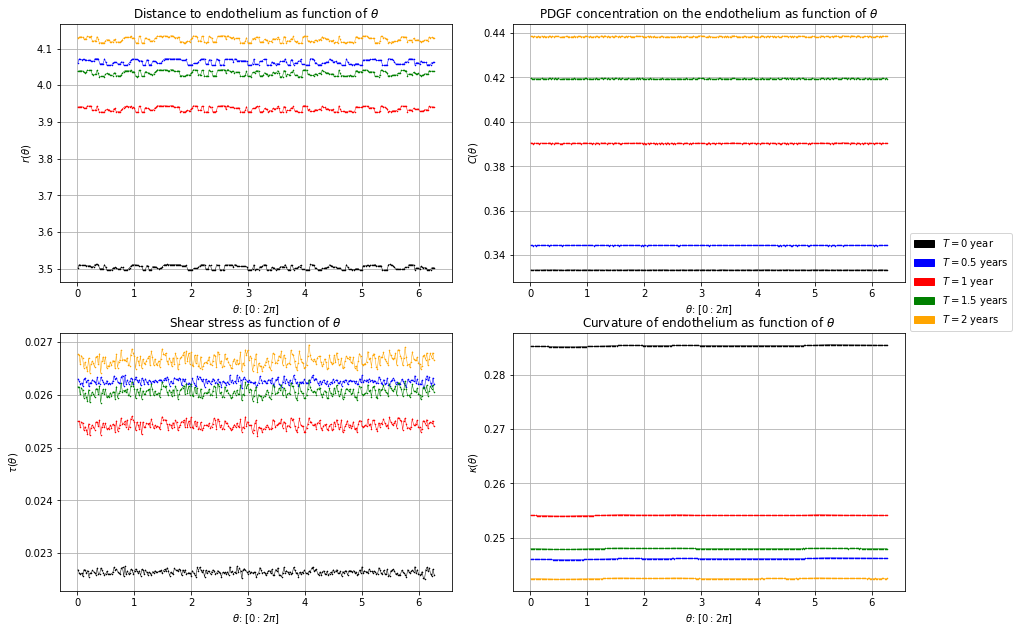

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(13,9))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

ax[0,0].plot(theta_indices0, r_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices25, r_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices75, r_theta75, color='green', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices99, r_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].plot(theta_indices1500, r_theta1500, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([2,5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,0].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,0].set_ylabel('$r(\\theta)$')
ax[0,0].set_title('Distance to endothelium as function of $\\theta$')
ax[0,0].grid()

ax[0,1].plot(theta_indices0, pdgf_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices25, pdgf_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices75, pdgf_theta75, color='green', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices99, pdgf_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,1].set_ylabel('$C(\\theta)$')
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$')
ax[0,1].grid()

ax[1,0].plot(theta_indices0, tau_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices25, tau_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  
ax[1,0].plot(theta_indices50, tau_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices75, tau_theta75, color='green', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices99, tau_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0))
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,0].set_ylabel('$\\tau(\\theta)$')
ax[1,0].set_title('Shear stress as function of $\\theta$')
ax[1,0].grid()

ax[1,1].plot(theta_indices0, kappa_new_0, color='black', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices25, kappa_new_25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_new_50, color='red', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices75, kappa_new_75, color='green', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices99, kappa_new_99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[1,1].set_ylim([0.1,0.4])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
#pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
#ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,1].set_ylabel('$\\kappa(\\theta)$')
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$')
ax[1,1].grid()
plt.savefig('annularcomparisonplots', bbox_inches='tight',dpi=90)

Smoothing $\\Tau(\\theta)$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps
#from csaps import UnivariateCubicSmoothingSpline

#np.random.seed(1234)

x0 = theta_indices0
s0 = tau_theta0
x25 = theta_indices25
s25 = tau_theta25
x50 = theta_indices50
s50 = tau_theta50
x75 = theta_indices75
s75 = tau_theta75
x99 = theta_indices99
s99 = tau_theta99

#xi = np.linspace(x[0], x[-1], len(x))


#x = np.linspace(-5., 5., 25)
#y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

#sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.0001)
sh0 = csaps(x0, s0, smooth=0.99)
sh25 = csaps(x25, s25, smooth=0.99)
sh50 = csaps(x50, s50, smooth=0.99)
sh75 = csaps(x75, s75, smooth=0.99)
sh99 = csaps(x99, s99, smooth=0.99)


xs0 = np.linspace(x0[0], x0[-1], len(x0))
ss0 = sh0(xs0)
xs25 = np.linspace(x25[0], x25[-1], len(x25))
ss25 = sh25(xs25)
xs50 = np.linspace(x50[0], x50[-1], len(x50))
ss50 = sh50(xs50)
xs75 = np.linspace(x75[0], x75[-1], len(x75))
ss75 = sh75(xs75)
xs99 = np.linspace(x99[0], x99[-1], len(x99))
ss99 = sh99(xs99)

shear_theta0 = ss0
shear_theta25 = ss25
shear_theta50 = ss50
shear_theta75 = ss75
shear_theta99 = ss99


#plt.plot(xs0, ss0, '-')
#plt.ylim([6.8,6.825])
#plt.show()

Smoothing pdgf

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps
#from csaps import UnivariateCubicSmoothingSpline

#np.random.seed(1234)

x0 = theta_indices0
p0 = pdgf_theta0
x25 = theta_indices25
p25 = pdgf_theta25
x50 = theta_indices50
p50 = pdgf_theta50
x75 = theta_indices75
p75 = pdgf_theta75
x99 = theta_indices99
p99 = pdgf_theta99

#xi = np.linspace(x[0], x[-1], len(x))


#x = np.linspace(-5., 5., 25)
#y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

#sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.0001)
ph0 = csaps(x0, p0, smooth=0.1)
ph25 = csaps(x25, p25, smooth=0.1)
ph50 = csaps(x50, p50, smooth=0.1)
ph75 = csaps(x75, p75, smooth=0.1)
ph99 = csaps(x99, p99, smooth=0.1)


xs0 = np.linspace(x0[0], x0[-1], len(x0))
ps0 = ph0(xs0)
xs25 = np.linspace(x25[0], x25[-1], len(x25))
ps25 = ph25(xs25)
xs50 = np.linspace(x50[0], x50[-1], len(x50))
ps50 = ph50(xs50)
xs75 = np.linspace(x75[0], x75[-1], len(x75))
ps75 = ph75(xs75)
xs99 = np.linspace(x99[0], x99[-1], len(x99))
ps99 = ph99(xs99)

pdgf_theta_new0 = ps0
pdgf_theta_new25 = ps25
pdgf_theta_new50 = ps50
pdgf_theta_new75 = ps75
pdgf_theta_new99 = ps99


#plt.plot(xs0, ss0, '-')
#plt.ylim([6.8,6.825])
#plt.show()

In [14]:
df0['reg_kappa_theta'] = kappa_new_0
df25['reg_kappa_theta'] = kappa_new_25
df50['reg_kappa_theta'] = kappa_new_50
df75['reg_kappa_theta'] = kappa_new_75
df99['reg_kappa_theta'] = kappa_new_99

In [15]:
df99

theta_indices  r_indices  tau_indices  kappa_theta  pdgf_theta  \
0         0.004996   4.129886     0.026767     0.237177    0.438644   
1         0.026266   4.130874     0.026765     0.221002    0.438532   
2         0.047207   4.131660     0.026587     0.171630    0.438201   
3         0.068616   4.131823     0.026746     0.190782    0.438520   
4         0.089666   4.131034     0.026702     0.292907    0.438415   
..             ...        ...          ...          ...         ...   
292       6.182521   4.131299     0.026687     0.280267    0.438633   
293       6.203579   4.129348     0.026788     0.167459    0.438664   
294       6.224945   4.130249     0.026707     0.172877    0.438521   
295       6.245998   4.129894     0.026798     0.271248    0.438633   
296       6.267125   4.129128     0.026662     0.303867    0.438565   

     reg_kappa_theta  
0           0.242421  
1           0.242419  
2           0.242416  
3           0.242415  
4           0.242413  
..               ...  
292         0.242447  
293         0.242448  
294         0.242431  
295         0.242433  
296         0.242444  

[297 rows x 6 columns]

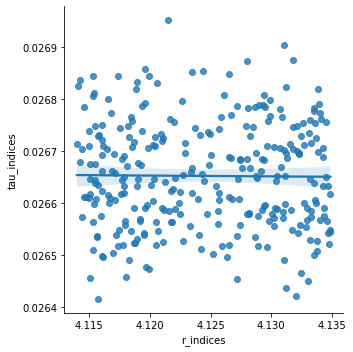

In [16]:
sns.lmplot(data = df99, x="r_indices", y="tau_indices")
plt.ticklabel_format(useOffset=False)

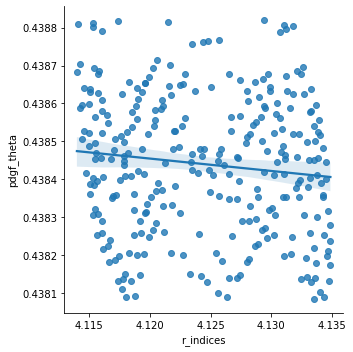

In [17]:
sns.lmplot(data = df99, x="r_indices", y="pdgf_theta")
plt.ticklabel_format(useOffset=False)

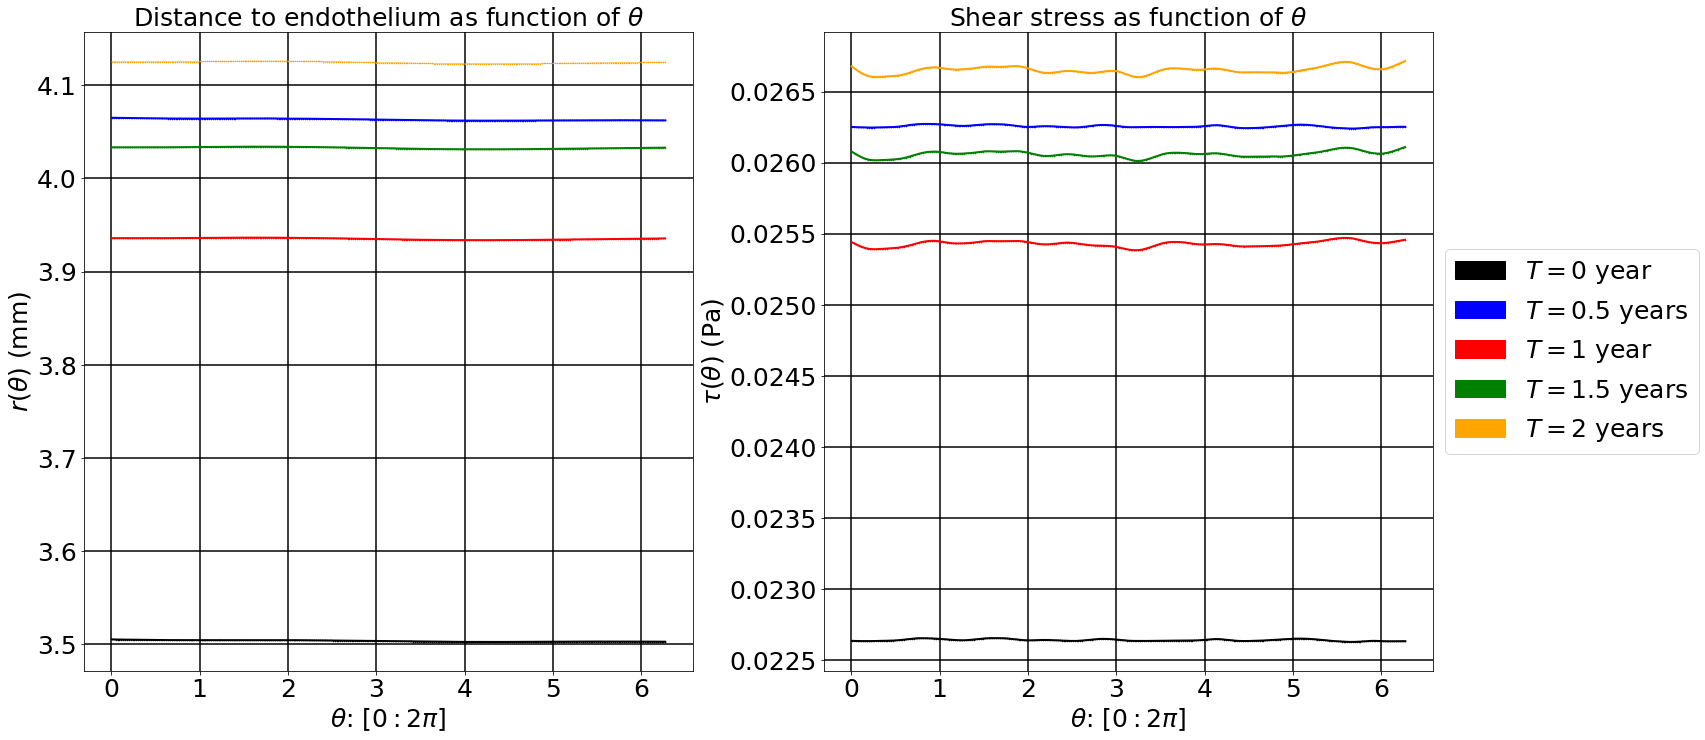

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(pad=3.0, w_pad=10.0, h_pad=3.0)
#plt.setp(ax.get_xticklabels(), fontsize=12)

ax[0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=0.5)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0].grid(color='black',linewidth = 1.5)


ax[1].plot(theta_indices0, shear_theta0, color='black', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices25, shear_theta25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1].plot(theta_indices50, shear_theta50, color='red', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices75, shear_theta75, color='green', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices99, shear_theta99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
ax[1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1].set_ylabel('$\\tau(\\theta)$ (Pa)',fontsize=25)
ax[1].set_title('Shear stress as function of $\\theta$',fontsize=25)
ax[1].grid(color='black',linewidth = 1.5)

for ax in (ax[0], ax[1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('annularrthetavstautheta', bbox_inches='tight',dpi=85)

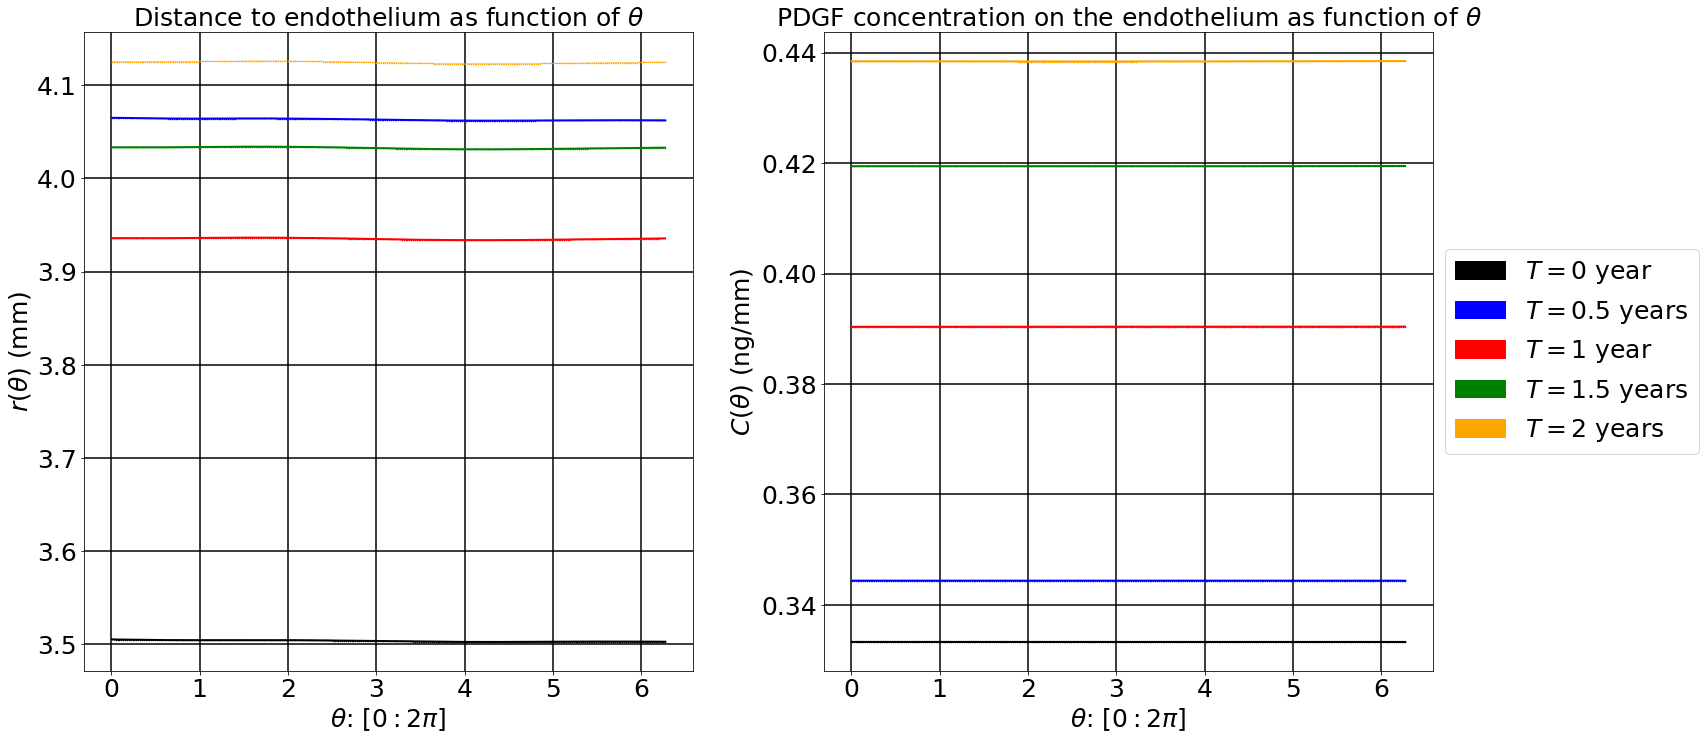

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(pad=3.0, w_pad=10.0, h_pad=3.0)
#plt.setp(ax.get_xticklabels(), fontsize=12)

ax[0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=0.5)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0].grid(color='black',linewidth = 1.5)


ax[1].plot(theta_indices0, pdgf_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices25, pdgf_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1].plot(theta_indices50, pdgf_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices75, pdgf_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices99, pdgf_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
ax[1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1].set_ylabel('$C(\\theta)$ (ng/mm)',fontsize=25)
ax[1].set_title('PDGF concentration on the endothelium as function of $\\theta$',fontsize=25)
ax[1].grid(color='black',linewidth = 1.5)

for ax in (ax[0], ax[1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('annularrthetavspdgftheta', bbox_inches='tight',dpi=85)

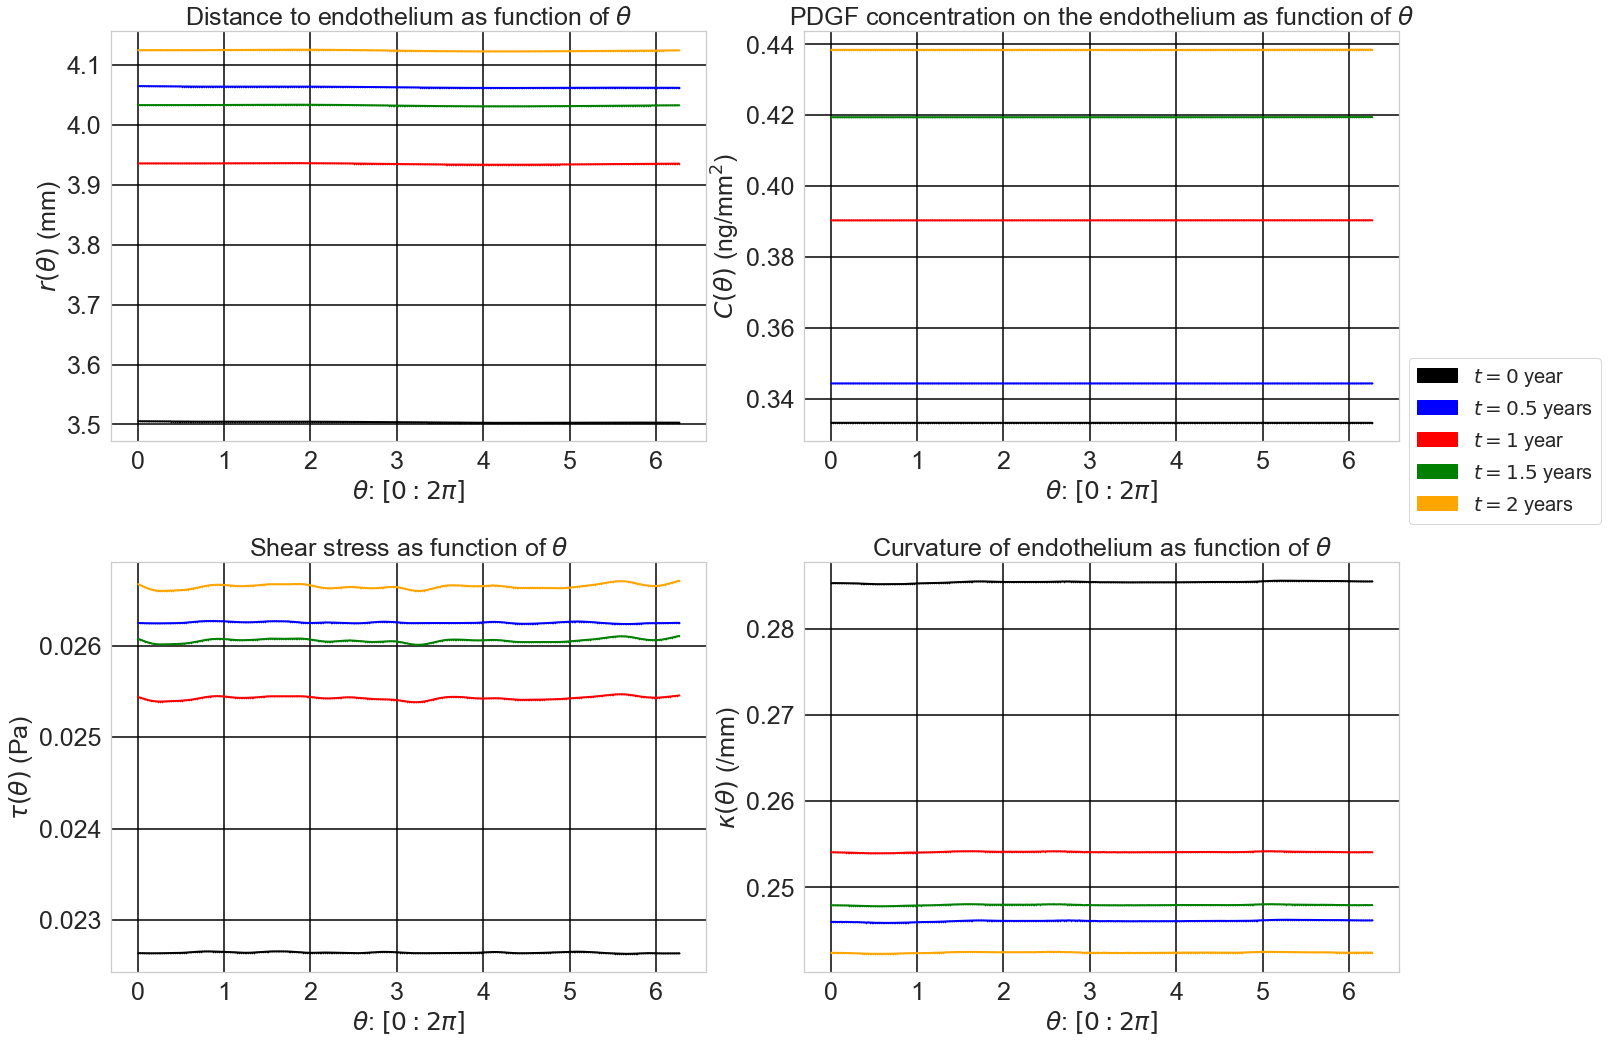

In [58]:
import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

fig, ax = plt.subplots(2, 2, figsize=(20,15))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=5.0)

ax[0,0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0,0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0,0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0,0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
#ax[0,0].plot(theta_indices1500, r_theta1500, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([2,5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,0].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0,0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0,0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0,0].grid(color='black',linewidth = 1.5)

ax[0,1].plot(theta_indices0, pdgf_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0,1].plot(theta_indices25, pdgf_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0,1].plot(theta_indices75, pdgf_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0,1].plot(theta_indices99, pdgf_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0,1].set_ylabel('$C(\\theta)$ (ng/mm$^{2}$)',fontsize=25)
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$',fontsize=25)
ax[0,1].grid(color='black',linewidth = 1.5)

ax[1,0].plot(theta_indices0, shear_theta0, color='black', marker = '*', markersize=1, lw=2)
ax[1,0].plot(theta_indices25, shear_theta25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1,0].plot(theta_indices50, shear_theta50, color='red', marker = '*', markersize=1, lw=2)
ax[1,0].plot(theta_indices75, shear_theta75, color='green', marker = '*', markersize=1, lw=2)
ax[1,0].plot(theta_indices99, shear_theta99, color='orange', marker = '*', markersize=1, lw=2)
#ax[0,0].set_ylim([3.4,3.5])
pop_a = mpatches.Patch(color='black', label = '$t=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$t=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$t=1$ year')
pop_d = mpatches.Patch(color='green', label = '$t=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$t=2$ years')
ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0))
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1,0].set_ylabel('$\\tau(\\theta)$ (Pa)',fontsize=25)
ax[1,0].set_title('Shear stress as function of $\\theta$',fontsize=25)
ax[1,0].grid(color='black',linewidth = 1.5)

ax[1,1].plot(theta_indices0, kappa_new_0, color='black', marker = '*', markersize=1, lw=2)
ax[1,1].plot(theta_indices25, kappa_new_25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_new_50, color='red', marker = '*', markersize=1, lw=2)
ax[1,1].plot(theta_indices75, kappa_new_75, color='green', marker = '*', markersize=1, lw=2)
ax[1,1].plot(theta_indices99, kappa_new_99, color='orange', marker = '*', markersize=1, lw=2)
#ax[1,1].set_ylim([0.1,0.4])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
#pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
#ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1,1].set_ylabel('$\\kappa(\\theta)$ (/mm)',fontsize=25)
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$',fontsize=25)
ax[1,1].grid(color='black',linewidth = 1.5)
for ax in (ax[0,0], ax[0,1], ax[1,0], ax[1,1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('annularcomparisonplotsregularized', bbox_inches='tight',dpi=90)

In [21]:
d = {'r($\theta$)': pd.Series(r_theta_new0),
   '$\tau$($\theta)$': pd.Series(shear_theta0),
     'C($\theta$)': pd.Series(pdgf_theta_new0),
     '$\kappa$($\theta)$': pd.Series(kappa_new_0)} 
    
# creates Dataframe.
df_reg_0 = pd.DataFrame(d)
  
# print the data.
df_reg_0

r($\theta$)  $\tau$($\theta)$  C($\theta$)  $\kappa$($\theta)$
0       3.505357          0.022635     0.333295            0.285276
1       3.505331          0.022635     0.333295            0.285284
2       3.505305          0.022634     0.333295            0.285286
3       3.505278          0.022634     0.333295            0.285277
4       3.505252          0.022634     0.333295            0.285277
..           ...               ...          ...                 ...
292     3.502980          0.022633     0.333287            0.285474
293     3.502972          0.022633     0.333287            0.285473
294     3.502965          0.022633     0.333287            0.285471
295     3.502957          0.022633     0.333286            0.285474
296     3.502949          0.022633     0.333286            0.285477

[297 rows x 4 columns]

In [22]:
d = {'r($\theta$)':r_theta_new0,
   '$\tau$($\theta)$': shear_theta0,
     'C($\theta$)': pdgf_theta_new0,
     '$\kappa$($\theta)$': kappa_new_0} 
    
# creates Dataframe.
df_reg_0 = pd.DataFrame(d)
  
# print the data.
df_reg_0

r($\theta$)  $\tau$($\theta)$  C($\theta$)  $\kappa$($\theta)$
0       3.505357          0.022635     0.333295            0.285276
1       3.505331          0.022635     0.333295            0.285284
2       3.505305          0.022634     0.333295            0.285286
3       3.505278          0.022634     0.333295            0.285277
4       3.505252          0.022634     0.333295            0.285277
..           ...               ...          ...                 ...
292     3.502980          0.022633     0.333287            0.285474
293     3.502972          0.022633     0.333287            0.285473
294     3.502965          0.022633     0.333287            0.285471
295     3.502957          0.022633     0.333286            0.285474
296     3.502949          0.022633     0.333286            0.285477

[297 rows x 4 columns]

In [23]:
d50 = {'r($\theta$)':r_theta_new50,
   '$\tau$($\theta)$': shear_theta50,
     'C($\theta$)': pdgf_theta_new50,
     '$\kappa$($\theta)$': kappa_new_50} 
    
# creates Dataframe.
df_reg_50 = pd.DataFrame(d50)
  
# print the data.
df_reg_50

r($\theta$)  $\tau$($\theta)$  C($\theta$)  $\kappa$($\theta)$
0       3.935927          0.025441     0.390374            0.254074
1       3.935922          0.025434     0.390374            0.254071
2       3.935918          0.025428     0.390374            0.254066
3       3.935913          0.025422     0.390374            0.254066
4       3.935909          0.025416     0.390374            0.254064
..           ...               ...          ...                 ...
292     3.935541          0.025448     0.390398            0.254094
293     3.935567          0.025451     0.390398            0.254097
294     3.935593          0.025453     0.390399            0.254079
295     3.935619          0.025455     0.390399            0.254077
296     3.935644          0.025457     0.390399            0.254084

[297 rows x 4 columns]

<AxesSubplot:>

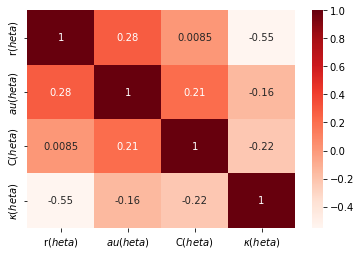

In [24]:
import seaborn as sb
corr = df_reg_0.corr()
sb.heatmap(corr, cmap="Reds", annot=True)

In [25]:
d99 = {'r($\theta$)': pd.Series(r_theta_new99),
   '$\tau$($\theta)$': pd.Series(shear_theta99),
     'C($\theta$)': pd.Series(pdgf_theta_new99),
     '$\kappa$($\theta)$': pd.Series(kappa_new_99)}   
    
# creates Dataframe.
df_reg_99 = pd.DataFrame(d99)
  
# print the data.
df_reg_99 

r($\theta$)  $\tau$($\theta)$  C($\theta$)  $\kappa$($\theta)$
0       4.125082          0.026677     0.438449            0.242421
1       4.125080          0.026668     0.438449            0.242419
2       4.125078          0.026659     0.438449            0.242416
3       4.125075          0.026650     0.438449            0.242415
4       4.125073          0.026641     0.438449            0.242413
..           ...               ...          ...                 ...
292     4.124653          0.026692     0.438499            0.242447
293     4.124677          0.026698     0.438500            0.242448
294     4.124701          0.026704     0.438501            0.242431
295     4.124725          0.026710     0.438501            0.242433
296     4.124749          0.026716     0.438502            0.242444

[297 rows x 4 columns]

In [26]:
df_reg_99.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.077465    -0.274917   
$\tau$($\theta)$       0.077465          1.000000     0.443121   
C($\theta$)           -0.274917          0.443121     1.000000   
$\kappa$($\theta)$     0.036114          0.362609    -0.094459   

                    $\kappa$($\theta)$  
r($\theta$)                   0.036114  
$\tau$($\theta)$              0.362609  
C($\theta$)                  -0.094459  
$\kappa$($\theta)$            1.000000

In [27]:
d25 = {'r($\theta$)': pd.Series(r_theta_new25),
   '$\tau$($\theta)$': pd.Series(shear_theta25),
     'C($\theta$)': pd.Series(pdgf_theta_new25),
     '$\kappa$($\theta)$': pd.Series(kappa_new_25)}   
    
# creates Dataframe.
df_reg_25 = pd.DataFrame(d25)
  
# print the data.
df_reg_25 

r($\theta$)  $\tau$($\theta)$  C($\theta$)  $\kappa$($\theta)$
0       4.065096          0.026252     0.344390            0.245997
1       4.065065          0.026251     0.344390            0.246006
2       4.065034          0.026250     0.344390            0.246008
3       4.065003          0.026250     0.344390            0.245994
4       4.064972          0.026249     0.344390            0.245992
..           ...               ...          ...                 ...
292     4.062307          0.026253     0.344386            0.246169
293     4.062297          0.026253     0.344386            0.246166
294     4.062288          0.026253     0.344386            0.246163
295     4.062278          0.026253     0.344386            0.246168
296     4.062269          0.026253     0.344386            0.246173

[297 rows x 4 columns]

In [28]:
df_reg_25.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.347496     0.389728   
$\tau$($\theta)$       0.347496          1.000000     0.258961   
C($\theta$)            0.389728          0.258961     1.000000   
$\kappa$($\theta)$    -0.555341         -0.220395    -0.529565   

                    $\kappa$($\theta)$  
r($\theta$)                  -0.555341  
$\tau$($\theta)$             -0.220395  
C($\theta$)                  -0.529565  
$\kappa$($\theta)$            1.000000

In [29]:
d50 = {'r($\theta$)': pd.Series(r_theta_new50),
   '$\tau$($\theta)$': pd.Series(shear_theta50),
     'C($\theta$)': pd.Series(pdgf_theta_new50),
     '$\kappa$($\theta)$': pd.Series(kappa_new_50)}   
    
# creates Dataframe.
df_reg_50 = pd.DataFrame(d50)
df_reg_50.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.212941    -0.128196   
$\tau$($\theta)$       0.212941          1.000000     0.460451   
C($\theta$)           -0.128196          0.460451     1.000000   
$\kappa$($\theta)$    -0.043003          0.408053     0.006189   

                    $\kappa$($\theta)$  
r($\theta$)                  -0.043003  
$\tau$($\theta)$              0.408053  
C($\theta$)                   0.006189  
$\kappa$($\theta)$            1.000000

In [30]:
d75 = {'r($\theta$)': pd.Series(r_theta_new75),
   '$\tau$($\theta)$': pd.Series(shear_theta75),
     'C($\theta$)': pd.Series(pdgf_theta_new75),
     '$\kappa$($\theta)$': pd.Series(kappa_new_75)}   
    
# creates Dataframe.
df_reg_75 = pd.DataFrame(d75)
df_reg_75.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.139784    -0.240178   
$\tau$($\theta)$       0.139784          1.000000     0.445353   
C($\theta$)           -0.240178          0.445353     1.000000   
$\kappa$($\theta)$     0.001519          0.394314    -0.041070   

                    $\kappa$($\theta)$  
r($\theta$)                   0.001519  
$\tau$($\theta)$              0.394314  
C($\theta$)                  -0.041070  
$\kappa$($\theta)$            1.000000

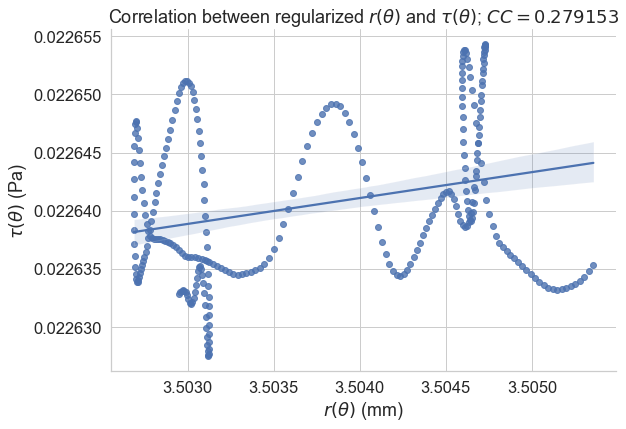

In [31]:
sns.set(font_scale = 1.5)  # 0 year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_0, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=0.279153$')
plt.savefig('annularrvstauT0', bbox_inches='tight',dpi=300)

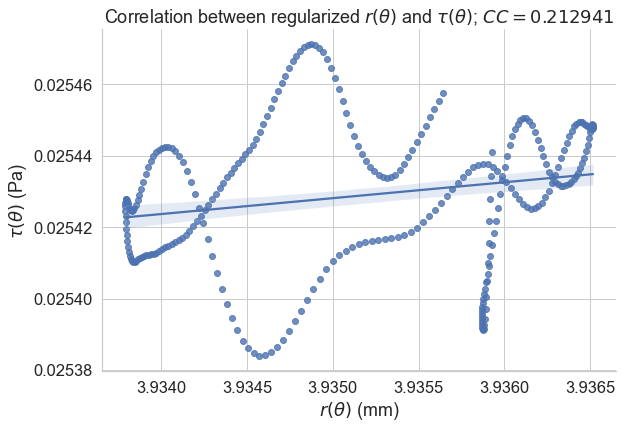

In [32]:
sns.set(font_scale = 1.5)  # 1 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_50, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=0.212941$')
plt.savefig('annularrvstauT1', bbox_inches='tight',dpi=300)

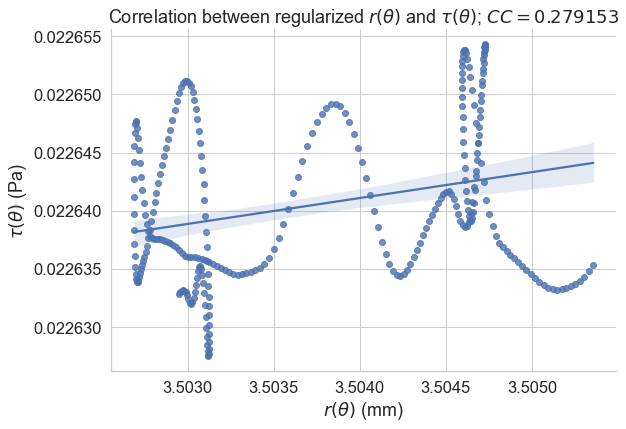

In [33]:
sns.set(font_scale = 1.5)  # 0 year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_0, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=0.279153$')
plt.savefig('annularrvstauT0', bbox_inches='tight',dpi=300)

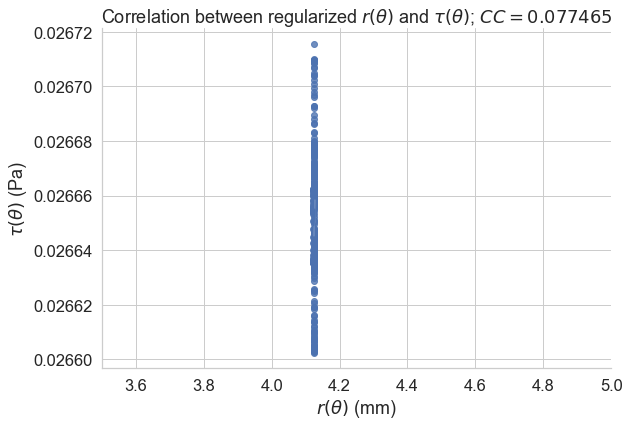

In [34]:
sns.set(font_scale = 1.5)  # 2 Years
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_99, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlim=(3.5,5.0))#, ylim=(0.022630,0.02672))
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=0.077465$')
plt.savefig('annularrvstauT2', bbox_inches='tight',dpi=300)

In [35]:
df_reg_0.corr() # T = 0

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.279153     0.008533   
$\tau$($\theta)$       0.279153          1.000000     0.210013   
C($\theta$)            0.008533          0.210013     1.000000   
$\kappa$($\theta)$    -0.551429         -0.155056    -0.224198   

                    $\kappa$($\theta)$  
r($\theta$)                  -0.551429  
$\tau$($\theta)$             -0.155056  
C($\theta$)                  -0.224198  
$\kappa$($\theta)$            1.000000

In [36]:
df_reg_25.corr() # T = 0.5

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.347496     0.389728   
$\tau$($\theta)$       0.347496          1.000000     0.258961   
C($\theta$)            0.389728          0.258961     1.000000   
$\kappa$($\theta)$    -0.555341         -0.220395    -0.529565   

                    $\kappa$($\theta)$  
r($\theta$)                  -0.555341  
$\tau$($\theta)$             -0.220395  
C($\theta$)                  -0.529565  
$\kappa$($\theta)$            1.000000

In [37]:
df_reg_50.corr() # T = 1

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.212941    -0.128196   
$\tau$($\theta)$       0.212941          1.000000     0.460451   
C($\theta$)           -0.128196          0.460451     1.000000   
$\kappa$($\theta)$    -0.043003          0.408053     0.006189   

                    $\kappa$($\theta)$  
r($\theta$)                  -0.043003  
$\tau$($\theta)$              0.408053  
C($\theta$)                   0.006189  
$\kappa$($\theta)$            1.000000

In [38]:
df_reg_75.corr() # T = 1.5

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.139784    -0.240178   
$\tau$($\theta)$       0.139784          1.000000     0.445353   
C($\theta$)           -0.240178          0.445353     1.000000   
$\kappa$($\theta)$     0.001519          0.394314    -0.041070   

                    $\kappa$($\theta)$  
r($\theta$)                   0.001519  
$\tau$($\theta)$              0.394314  
C($\theta$)                  -0.041070  
$\kappa$($\theta)$            1.000000

In [39]:
df_reg_99.corr() # T = 2

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.077465    -0.274917   
$\tau$($\theta)$       0.077465          1.000000     0.443121   
C($\theta$)           -0.274917          0.443121     1.000000   
$\kappa$($\theta)$     0.036114          0.362609    -0.094459   

                    $\kappa$($\theta)$  
r($\theta$)                   0.036114  
$\tau$($\theta)$              0.362609  
C($\theta$)                  -0.094459  
$\kappa$($\theta)$            1.000000

In [40]:
shear_0_exact = np.full([len(theta_indices0)], 0.013*np.sqrt(38.5639229002531/np.pi)/2, dtype=np.float64)
shear_05_exact = np.full([len(theta_indices0)],0.013*np.sqrt(51.8629326055536/np.pi)/2, dtype=np.float64)
shear_1_exact = np.full([len(theta_indices0)],0.013*np.sqrt(48.6461046170531/np.pi)/2, dtype=np.float64)
shear_15_exact = np.full([len(theta_indices0)],0.013*np.sqrt(51.0866580760333/np.pi)/2, dtype=np.float64)
shear_2_exact = np.full([len(theta_indices0)],0.013*np.sqrt(53.438569033525/np.pi)/2, dtype=np.float64)

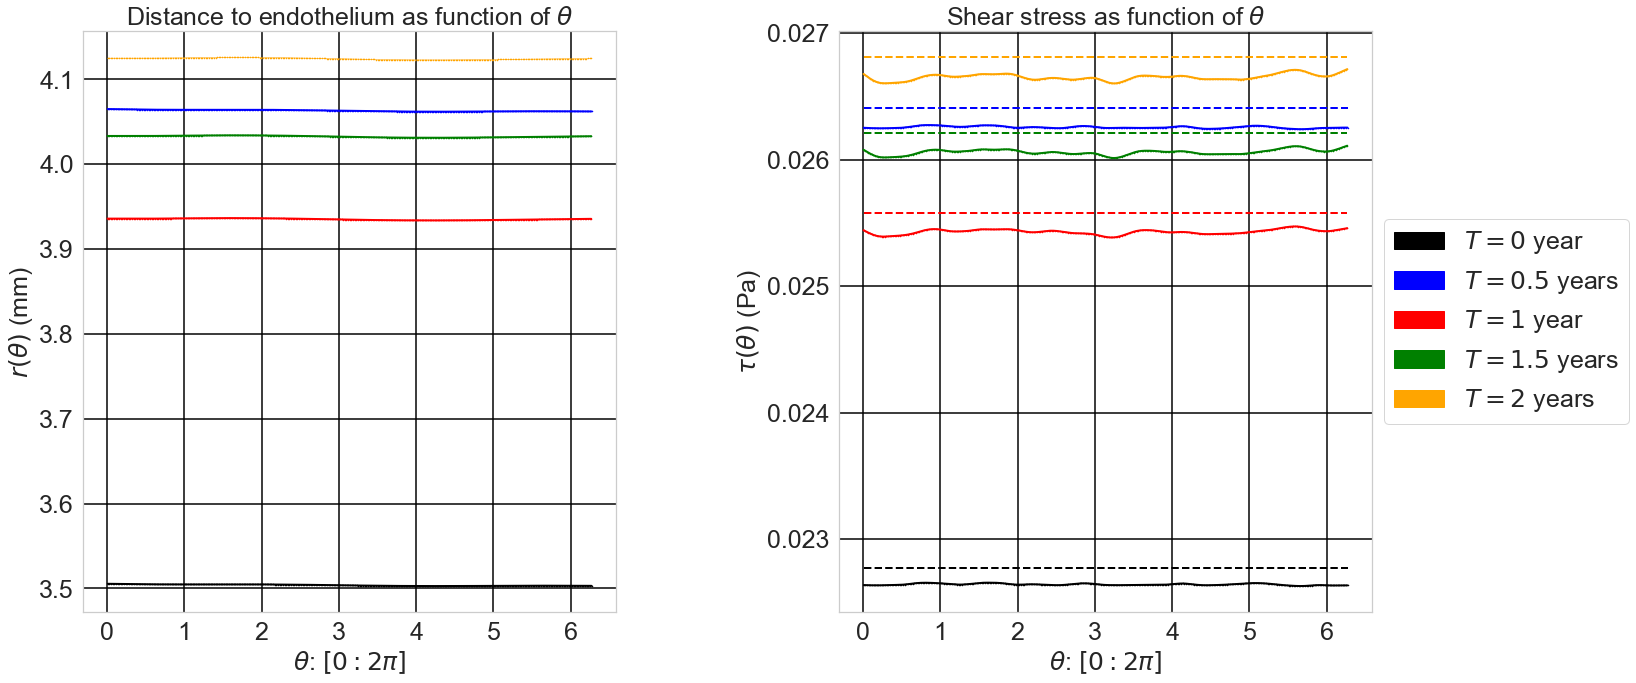

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(pad=3.0, w_pad=10.0, h_pad=3.0)
#plt.setp(ax.get_xticklabels(), fontsize=12)

ax[0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=0.5)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0].grid(color='black',linewidth = 1.5)


ax[1].plot(theta_indices0, shear_theta0, color='black', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices0, shear_0_exact, color='black', linestyle = 'dashed', lw=2)

ax[1].plot(theta_indices25, shear_theta25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1].plot(theta_indices25, shear_05_exact, color='blue', linestyle = 'dashed', markersize=1, lw=2) 

ax[1].plot(theta_indices50, shear_theta50, color='red', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices50, shear_1_exact, color='red', linestyle = 'dashed', markersize=1, lw=2) 

ax[1].plot(theta_indices75, shear_theta75, color='green', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices75, shear_15_exact, color='green', linestyle = 'dashed', markersize=1, lw=2) 

ax[1].plot(theta_indices99, shear_theta99, color='orange', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices99, shear_2_exact, color='orange', linestyle = 'dashed', markersize=1, lw=2)

pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
ax[1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1].set_ylabel('$\\tau(\\theta)$ (Pa)',fontsize=25)
ax[1].set_title('Shear stress as function of $\\theta$',fontsize=25)
ax[1].grid(color='black',linewidth = 1.5)

for ax in (ax[0], ax[1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('annularrthetavstautheta', bbox_inches='tight',dpi=85)

In [42]:
rvstau = np.array([])
rvsc = np.array([])
tauvsc = np.array([])
rvskappa = np.array([])
tauvskappa = np.array([])
cvskappa = np.array([])

df_reg_0.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.279153     0.008533   
$\tau$($\theta)$       0.279153          1.000000     0.210013   
C($\theta$)            0.008533          0.210013     1.000000   
$\kappa$($\theta)$    -0.551429         -0.155056    -0.224198   

                    $\kappa$($\theta)$  
r($\theta$)                  -0.551429  
$\tau$($\theta)$             -0.155056  
C($\theta$)                  -0.224198  
$\kappa$($\theta)$            1.000000

In [43]:
rvstau = np.append(rvstau, 0.279153)
rvsc = np.append(rvsc, 0.008533)
tauvsc = np.append(tauvsc, 0.210013)
rvskappa = np.append(rvskappa, -0.551429)
tauvskappa = np.append(tauvskappa, -0.155056)
cvskappa = np.append(cvskappa, -0.224198)

In [44]:
df_reg_25.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.347496     0.389728   
$\tau$($\theta)$       0.347496          1.000000     0.258961   
C($\theta$)            0.389728          0.258961     1.000000   
$\kappa$($\theta)$    -0.555341         -0.220395    -0.529565   

                    $\kappa$($\theta)$  
r($\theta$)                  -0.555341  
$\tau$($\theta)$             -0.220395  
C($\theta$)                  -0.529565  
$\kappa$($\theta)$            1.000000

In [45]:
rvstau = np.append(rvstau, 0.347496)
rvsc = np.append(rvsc, 0.389728)
tauvsc = np.append(tauvsc, 0.258961)
rvskappa = np.append(rvskappa, -0.555341)
tauvskappa = np.append(tauvskappa, -0.220395)
cvskappa = np.append(cvskappa, -0.529565)

In [46]:
df_reg_50.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.212941    -0.128196   
$\tau$($\theta)$       0.212941          1.000000     0.460451   
C($\theta$)           -0.128196          0.460451     1.000000   
$\kappa$($\theta)$    -0.043003          0.408053     0.006189   

                    $\kappa$($\theta)$  
r($\theta$)                  -0.043003  
$\tau$($\theta)$              0.408053  
C($\theta$)                   0.006189  
$\kappa$($\theta)$            1.000000

In [47]:
rvstau = np.append(rvstau, 0.212941)
rvsc = np.append(rvsc, -0.128196)
tauvsc = np.append(tauvsc, 0.460451)
rvskappa = np.append(rvskappa, -0.043003)
tauvskappa = np.append(tauvskappa, 0.408053)
cvskappa = np.append(cvskappa, 0.006189)

In [48]:
df_reg_75.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.139784    -0.240178   
$\tau$($\theta)$       0.139784          1.000000     0.445353   
C($\theta$)           -0.240178          0.445353     1.000000   
$\kappa$($\theta)$     0.001519          0.394314    -0.041070   

                    $\kappa$($\theta)$  
r($\theta$)                   0.001519  
$\tau$($\theta)$              0.394314  
C($\theta$)                  -0.041070  
$\kappa$($\theta)$            1.000000

In [49]:
rvstau = np.append(rvstau, 0.139784)
rvsc = np.append(rvsc, -0.240178)
tauvsc = np.append(tauvsc, 0.445353)
rvskappa = np.append(rvskappa, 0.001519)
tauvskappa = np.append(tauvskappa, 0.394314)
cvskappa = np.append(cvskappa, -0.041070)

In [50]:
df_reg_75.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000          0.139784    -0.240178   
$\tau$($\theta)$       0.139784          1.000000     0.445353   
C($\theta$)           -0.240178          0.445353     1.000000   
$\kappa$($\theta)$     0.001519          0.394314    -0.041070   

                    $\kappa$($\theta)$  
r($\theta$)                   0.001519  
$\tau$($\theta)$              0.394314  
C($\theta$)                  -0.041070  
$\kappa$($\theta)$            1.000000

In [51]:
rvstau = np.append(rvstau, 0.139784)
rvsc = np.append(rvsc, -0.240178)
tauvsc = np.append(tauvsc, 0.445353)
rvskappa = np.append(rvskappa, 0.001519)
tauvskappa = np.append(tauvskappa, 0.394314)
cvskappa = np.append(cvskappa, -0.041070) 

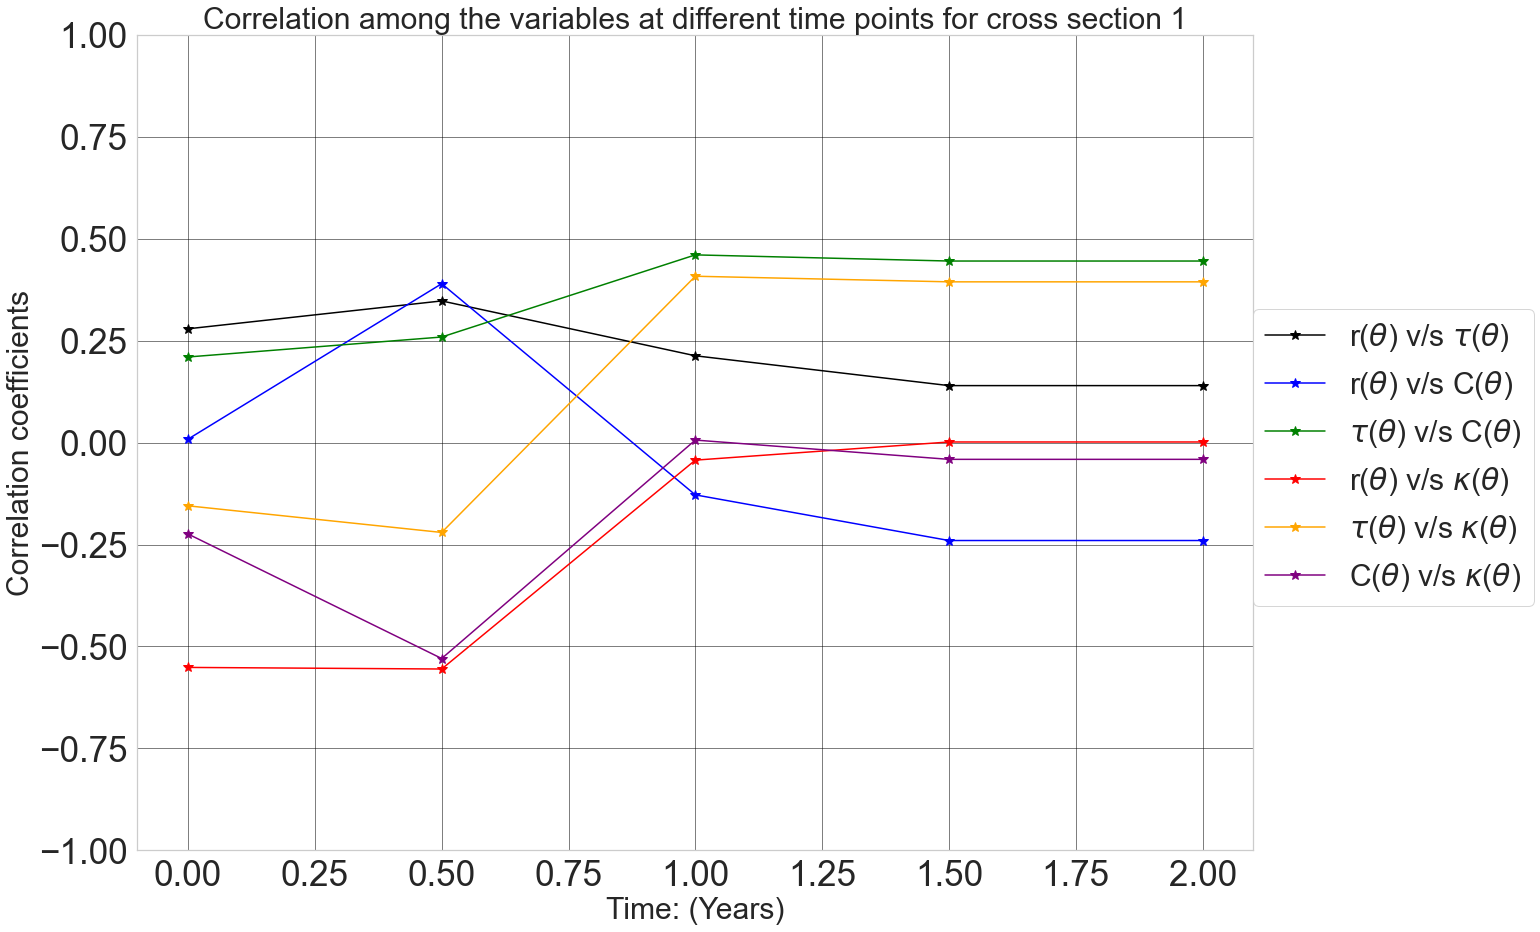

In [52]:
T = np.array([0, 0.5, 1.0, 1.5, 2.0])
plt.figure(figsize=(20,15)) 
plt.plot(T,rvstau, color='black', marker = '*', markersize=10, label='r($\\theta$) v/s $\\tau$($\\theta$)')
plt.plot(T,rvsc, color='blue', marker = '*', markersize=10, label='r($\\theta$) v/s C($\\theta$)')
plt.plot(T,tauvsc, color='green', marker = '*', markersize=10, label='$\\tau$($\\theta$) v/s C($\\theta$)')
plt.plot(T,rvskappa, color='red', marker = '*', markersize=10, label='r($\\theta$) v/s $\\kappa$($\\theta$)')
plt.plot(T,tauvskappa, color='orange', marker = '*', markersize=10, label='$\\tau$($\\theta$) v/s $\\kappa$($\\theta$)')
plt.plot(T,cvskappa, color='purple', marker = '*', markersize=10, label='C($\\theta$) v/s $\\kappa$($\\theta$)')
plt.xlabel('Time: (Years)',fontsize=30)
plt.ylabel('Correlation coefficients',fontsize=30)
plt.title('Correlation among the variables at different time points for cross section 1',fontsize=30)
plt.ylim([-1.0,1.0])
plt.tick_params(which='both', labelsize=35)
plt.grid(color='black',linewidth = 0.5)
plt.legend(loc=(1.0,0.3),fontsize=30)
plt.savefig('annularcorrcoeffsfordifftimes', bbox_inches='tight',dpi=85)
plt.show()

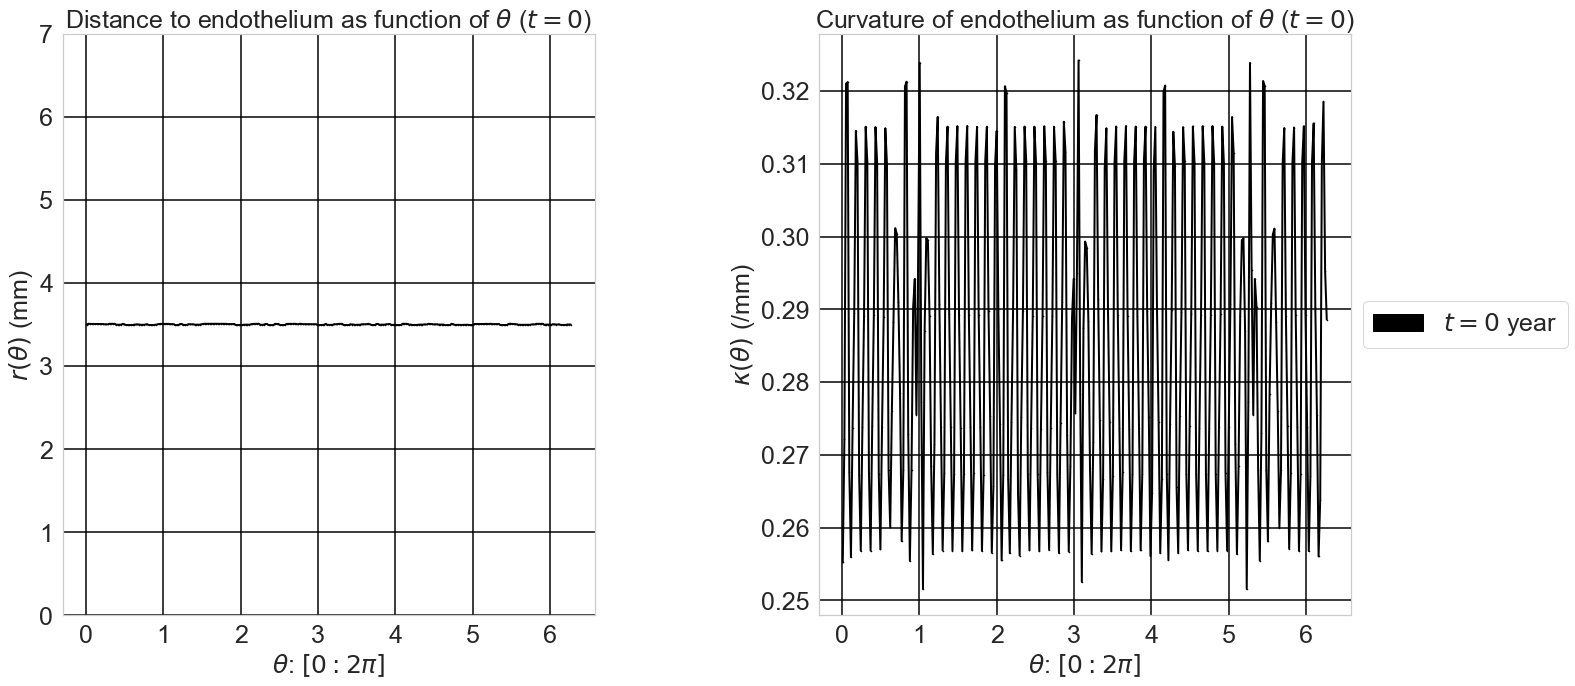

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(pad=3.0, w_pad=10.0, h_pad=3.0)
#plt.setp(ax.get_xticklabels(), fontsize=12)

ax[0].plot(theta_indices0, r_theta0, color='black', marker = '*', markersize=1, lw=2)

pop_a = mpatches.Patch(color='black', label = '$t=0$ year')

ax[0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0].set_ylim([0,7])
ax[0].set_title('Distance to endothelium as function of $\\theta$ ($t=0$)',fontsize=25)
ax[0].grid(color='black',linewidth = 1.5)


ax[1].plot(theta_indices0, kappa_theta0, color='black', marker = '*', markersize=1, lw=2)


pop_a = mpatches.Patch(color='black', label = '$t=0$ year')

ax[1].legend(handles=[pop_a],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
ax[1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1].set_ylabel('$\\kappa(\\theta)$ (/mm)',fontsize=25)
ax[1].set_title('Curvature of endothelium as function of $\\theta$ ($t=0$)',fontsize=25)
ax[1].grid(color='black',linewidth = 1.5)

for ax in (ax[0], ax[1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('newunregkappaT0', bbox_inches='tight',dpi=85)

In [54]:
kappa_0_exact = np.full([len(theta_indices0)], 1/np.sqrt(38.5639229002531/np.pi), dtype=np.float64)
kappa_0_exact

array([0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541996,
       0.28541996, 0.28541996, 0.28541996, 0.28541996, 0.28541

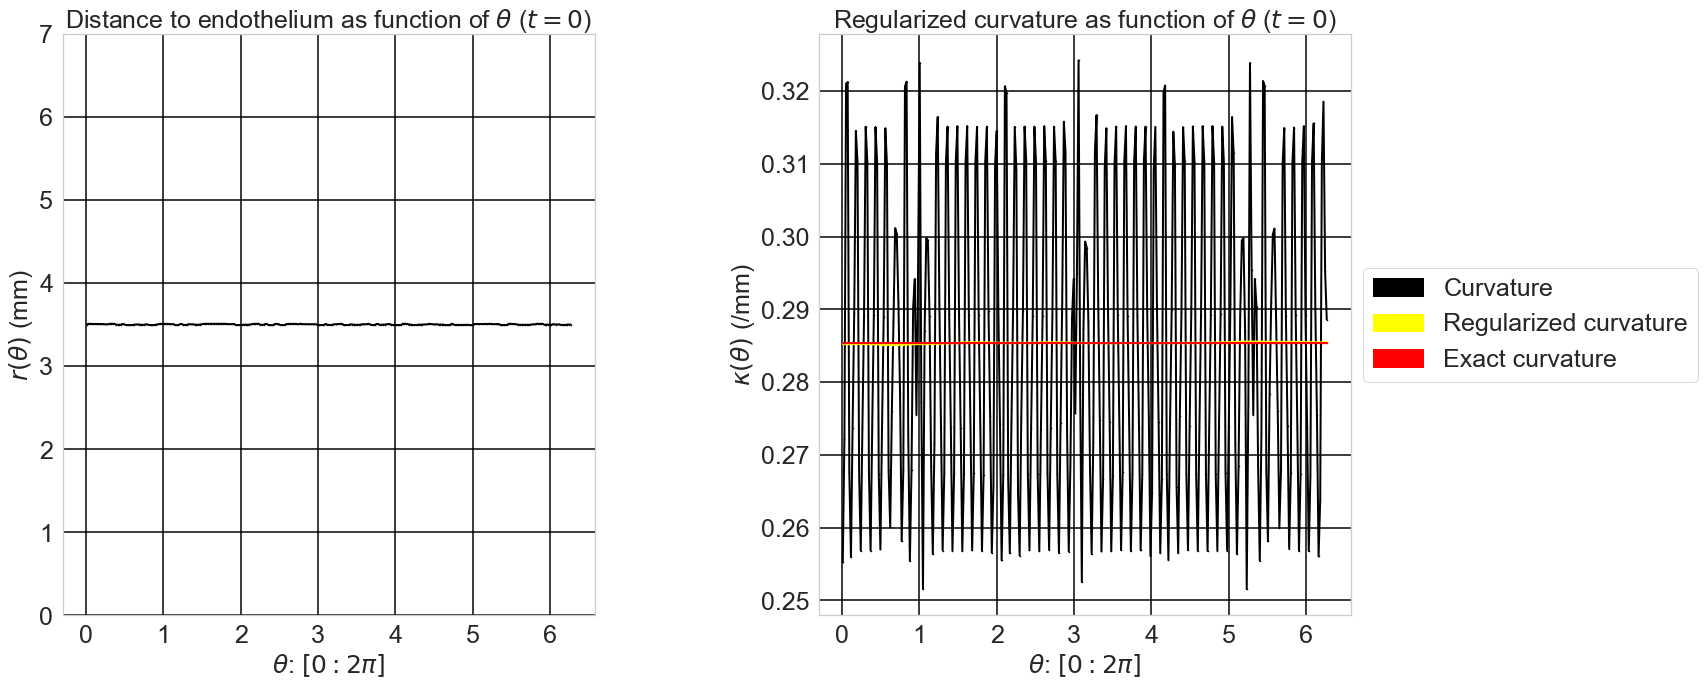

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(pad=3.0, w_pad=10.0, h_pad=3.0)
#plt.setp(ax.get_xticklabels(), fontsize=12)

ax[0].plot(theta_indices0, r_theta0, color='black', marker = '*', markersize=1, lw=2)

pop_a = mpatches.Patch(color='black', label = '$t=0$ year')

ax[0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0].set_ylim([0,7])
ax[0].set_title('Distance to endothelium as function of $\\theta$ ($t=0$)',fontsize=25)
ax[0].grid(color='black',linewidth = 1.5)


ax[1].plot(theta_indices0, kappa_theta0, color='black', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices0, kappa_new_0, color='yellow', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices0, kappa_0_exact, color='red', marker = '*', markersize=1, lw=2)

pop_a = mpatches.Patch(color='black', label = 'Curvature')
pop_b = mpatches.Patch(color='yellow', label = 'Regularized curvature')
pop_c = mpatches.Patch(color='red', label = 'Exact curvature')

ax[1].legend(handles=[pop_a, pop_b, pop_c],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
ax[1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1].set_ylabel('$\\kappa(\\theta)$ (/mm)',fontsize=25)
ax[1].set_title('Regularized curvature as function of $\\theta$ ($t=0$)',fontsize=25)
ax[1].grid(color='black',linewidth = 1.5)

for ax in (ax[0], ax[1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('newregkappaT0', bbox_inches='tight',dpi=85)